<a href="https://colab.research.google.com/github/sokrypton/ColabBio/blob/main/WHY_MDS_WORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# http://www.galileoco.com/literature/OCRyoungHouseholder38.pdf
# https://en.wikipedia.org/wiki/Multidimensional_scaling#Classical_multidimensional_scaling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# dimensions
dim = 3
# random coordinates
a = np.random.normal(size=(100,dim))
# center
a -= np.mean(a,0)

In [ ]:
# compute distance matrix, method #1
a_dm = np.sqrt(np.square((a[None,:]-a[:,None])).sum(-1))

# compute distance matrix, method #2
a_cov = a@a.T
a_norm = np.square(a).sum(-1)
aa_norm = a_norm[:,None]+a_norm[None,:]
a_cov_dm = np.sqrt(np.abs(aa_norm - 2*a_cov))

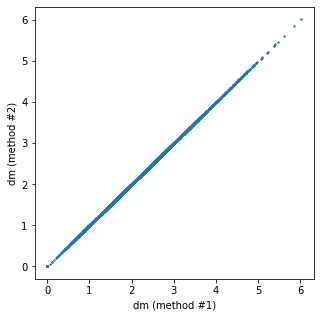

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(a_dm, a_cov_dm, s=1)
plt.xlabel("dm (method #1)")
plt.ylabel("dm (method #2)")
plt.show()

In [ ]:
# convert distance matrix into gram matrix
# aka "double centering"
L = a_dm.shape[0]
d = np.square(a_dm)
c = np.eye(L) - np.ones((L,L))/L
a_grm = -0.5 * c @ d @ c

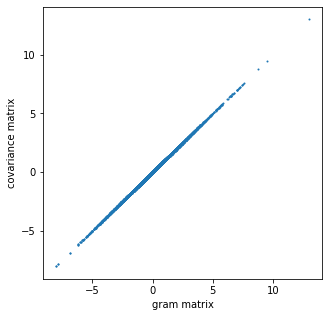

In [ ]:
# compare gram matrix to covariance matrix
plt.figure(figsize=(5,5))
plt.scatter(a_grm, a_cov, s=1)
plt.xlabel("gram matrix")
plt.ylabel("covariance matrix")
plt.show()

In [ ]:
# go from gram (or covariance matrix) back to distance matrix
e_val_grm, e_vec_grm = np.linalg.eigh(a_grm)
a_xyz_grm = np.sqrt(e_val_grm[-dim:]) * e_vec_grm[:,-dim:]
a_dm_grm = np.sqrt(np.square((a_xyz_grm[None,:] - a_xyz_grm[:,None])).sum(-1))

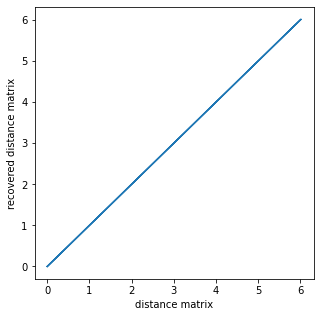

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(a_dm.flatten(), a_dm_grm.flatten())
plt.xlabel("distance matrix")
plt.ylabel("recovered distance matrix")
plt.show()